### Instalando a biblioteca Fundamentus

In [1]:
#!pip install fundamentus

### Importando as bibliotecas necessárias

In [2]:
import fundamentus
import pandas as pd
import requests_cache
import time, logging
import matplotlib.pyplot as plt
import seaborn

2023-03-19 14:46:18,055 [logging.log_init] INFO: LOGLEVEL=INFO


### Atribuindo valor a taxa de juros atual (Selic) e colocando ativos que estão descontados conforme o metodo de Joel Greenblatt

In [3]:
Selic = 13.75
ativos = ['ABEV3', 'ARZZ3', 'BAZA3', 'BBAS3', 'BBDC3', 'BEEF3', 'BPAC11', 'BRAP3',
          'BRKM5', 'BRSR6', 'CCRO3', 'CGRA4', 'CMIG4', 'COCE5', 'CPFE3', 'CSNA3',
          'CSUD3', 'CXSE3', 'DEXP3', 'ECOR3', 'ELET3', 'ENGI4', 'EQTL3', 'ETER3',
          'EUCA4', 'FESA4', 'FLRY3', 'FRAS3', 'GGBR3', 'GOAU3', 'HYPE3', 'ITSA3',
          'ITUB3', 'JBSS3', 'KEPL3', 'KLBN3', 'LEVE3', 'LREN3', 'LWSA3', 'MRFG3',
          'MYPK3', 'NEOE3', 'ODPV3', 'PETR3', 'POSI3', 'PRIO3', 'PTBL3', 'QUAL3',
          'RADL3', 'RANI3', 'RAPT4', 'ROMI3', 'SBSP3', 'SHOW3', 'SHUL4', 'SLCE3',
          'SQIA3', 'STBP3', 'SUZB3', 'TAEE3', 'TASA3', 'TGMA3', 'TOTS3', 'TPIS3',
          'TRPL4', 'TUPY3', 'UNIP3', 'VALE3', 'VLID3', 'VULC3', 'WEGE3', 'WIZC3']


### Criando uma lista vazia das informações dos ativos em linha

In [4]:
rows = []

###  Verificando se existe as informações dos ativos dentro do site Fundamentus

- Caso exista:
Coloque as informações dentro da lista vazia *rows

- Caso não exista:
Exiba a mensagem que o ativo não foi encontrado.

In [5]:
for ativo in ativos:
    try:
        df = fundamentus.get_papel(ativo)
        rows.append(df[['Papel', 'Cotacao', 'LPA', 'ROE', 'Div_Yield']].values[0])
    except:
        print(f'Ativo {ativo} não encontrado')

2023-03-19 14:46:18,893 [detalhes.get_papel] INFO: detalhes: call: get..._papel()
2023-03-19 14:46:20,216 [detalhes.get_papel] INFO: detalhes: call: get..._papel()
2023-03-19 14:46:21,435 [detalhes.get_papel] INFO: detalhes: call: get..._papel()
2023-03-19 14:46:22,626 [detalhes.get_papel] INFO: detalhes: call: get..._papel()
2023-03-19 14:46:23,888 [detalhes.get_papel] INFO: detalhes: call: get..._papel()
2023-03-19 14:46:25,088 [detalhes.get_papel] INFO: detalhes: call: get..._papel()
2023-03-19 14:46:26,370 [detalhes.get_papel] INFO: detalhes: call: get..._papel()
2023-03-19 14:46:27,403 [detalhes.get_papel] INFO: detalhes: call: get..._papel()
2023-03-19 14:46:28,618 [detalhes.get_papel] INFO: detalhes: call: get..._papel()
2023-03-19 14:46:29,947 [detalhes.get_papel] INFO: detalhes: call: get..._papel()
2023-03-19 14:46:31,205 [detalhes.get_papel] INFO: detalhes: call: get..._papel()
2023-03-19 14:46:32,329 [detalhes.get_papel] INFO: detalhes: call: get..._papel()
2023-03-19 14:46

### Criando um pandas dataframe para o resultado da consulta

In [6]:
df = pd.DataFrame(rows, columns=['Papel', 'Cotacao', 'LPA', 'ROE', 'Div_Yield'])

### Caso necessário, salve as informações do dataframe em um arquivo Excel

In [7]:
#df.to_excel('valor_justo.xlsx')

### Exibindo o dataframe

In [8]:
df

,Papel,Cotacao,LPA,ROE,Div_Yield
0,ABEV3,14.22,092,17.6%,5.4%
1,ARZZ3,66.78,385,16.0%,2.7%
2,BAZA3,59.91,2034,23.4%,6.0%
3,BBAS3,37.30,1075,20.1%,11.5%
4,BBDC3,11.66,195,13.4%,7.9%
...,...,...,...,...,...
67,VALE3,82.73,2113,51.3%,7.2%
68,VLID3,9.39,030,2.0%,2.8%
69,VULC3,12.41,191,27.5%,3.0%
70,WEGE3,39.87,100,28.4%,1.3%


### Verificando o tipo de item estão em cada coluna do dataframe

In [9]:
df.dtypes

Papel        object
Cotacao      object
LPA          object
ROE          object
Div_Yield    object
dtype: object

Veja que todos estão como *objects* - devemos transforma-los em float

### Transformando a coluna LPA (Lucro por Ação) em um valor do tipo *float* e divindo por 100

In [10]:
df.LPA = df.LPA.astype(float)/100

### Removendo os valores de LPA negativos, visto que se o Lucro Por Ação está negativo significa que a empresa teve prejuízo no período analisado. 
#### Isso pode indicar que a empresa está passando por dificuldades financeiras ou teve um desempenho ruim no mercado. 

In [11]:
df = df.loc[df['LPA'] > 0]

### Legal, agora vamos exibir nosso dataframe

In [12]:
df

,Papel,Cotacao,LPA,ROE,Div_Yield
0,ABEV3,14.22,0.92,17.6%,5.4%
1,ARZZ3,66.78,3.85,16.0%,2.7%
2,BAZA3,59.91,20.34,23.4%,6.0%
3,BBAS3,37.30,10.75,20.1%,11.5%
4,BBDC3,11.66,1.95,13.4%,7.9%
...,...,...,...,...,...
67,VALE3,82.73,21.13,51.3%,7.2%
68,VLID3,9.39,0.30,2.0%,2.8%
69,VULC3,12.41,1.91,27.5%,3.0%
70,WEGE3,39.87,1.00,28.4%,1.3%


### Removendo o simbolo de % dos itens da colunas ROE E Div_Yield, transformando em *float* e divindo por 100

In [13]:
df.ROE = [float(i.replace('%', ''))/100 for i in df.ROE.values]
df.Div_Yield = [float(i.replace('%', ''))/100 for i in df.Div_Yield.values]

C:\Users\Administrator\AppData\Local\Temp\ipykernel_980\2025229290.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.ROE = [float(i.replace('%', ''))/100 for i in df.ROE.values]
C:\Users\Administrator\AppData\Local\Temp\ipykernel_980\2025229290.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.Div_Yield = [float(i.replace('%', ''))/100 for i in df.Div_Yield.values]


### Verificando o tipo de item que temos em nosso dataframe

In [14]:
df.dtypes

Papel         object
Cotacao       object
LPA          float64
ROE          float64
Div_Yield    float64
dtype: object

### Criando uma coluna de Taxa de Crescimento de Lucro, onde:
- #### Subtrai-se o valor de Dividend Yield por Lucro por Ação, onde temos o valor chamado de **Payout Financeiro¹**
- #### Tendo o Payout, multiplica-se o valor pelo ROE da empresa

##### ¹ Payout financeiro é a proporção do lucro líquido de uma empresa que é distribuído como dividendos aos acionistas. É uma métrica usada na análise fundamentalista para avaliar a política de dividendos da empresa. Um payout alto pode limitar a capacidade de reinvestir ou lidar com crises financeiras, enquanto um payout baixo pode indicar a retenção de lucros para financiar o crescimento futuro.

In [15]:
df['Taxa de Crescimento de Lucro'] = (df['ROE'] * (1 - (df['Div_Yield'] - df['LPA'])))

C:\Users\Administrator\AppData\Local\Temp\ipykernel_980\2648431125.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Taxa de Crescimento de Lucro'] = (df['ROE'] * (1 - (df['Div_Yield'] - df['LPA'])))


### Dessa forma, temos a Taxa de Crescimento de Lucro, onde temos uma metrica de onde a empresa pode chegar.

### Agora criaremos uma nova coluna chamada Preço Justo, onde aplicaremos de fato a formula de Benjamin Graham
##### Ressaltando que:

- ##### LPA (Lucro por Ação): que representa o lucro líquido de uma empresa dividido pelo número de ações em circulação;
- ##### Selic: a taxa básica de juros do Brasil;
- ##### ROE (Retorno sobre o Patrimônio Líquido): que mede a capacidade da empresa de gerar lucros a partir dos investimentos dos acionistas;
- ##### Div_Yield: que é a relação entre os dividendos distribuídos pela empresa e o preço de mercado da ação.

In [16]:
df['Valor Justo'] = df['LPA'] * ((100 / Selic + 3)) + (2 * df['ROE'] * df['Div_Yield']) * (1 / 1.15)


C:\Users\Administrator\AppData\Local\Temp\ipykernel_980\38983926.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Valor Justo'] = df['LPA'] * ((100 / Selic + 3)) + (2 * df['ROE'] * df['Div_Yield']) * (1 / 1.15)


### Exibindo o dataframe com o Valor Justo

In [17]:
df

,Papel,Cotacao,LPA,ROE,Div_Yield,Taxa de Crescimento de Lucro,Valor Justo
0,ABEV3,14.22,0.92,0.176,0.054,0.328416,9.467438
1,ARZZ3,66.78,3.85,0.160,0.027,0.771680,39.557513
2,BAZA3,59.91,20.34,0.234,0.060,4.979520,208.971690
3,BBAS3,37.30,10.75,0.201,0.115,2.338635,110.472018
4,BBDC3,11.66,1.95,0.134,0.079,0.384714,20.050229
...,...,...,...,...,...,...,...
67,VALE3,82.73,21.13,0.513,0.072,11.315754,217.126964
68,VLID3,9.39,0.30,0.020,0.028,0.025440,3.082792
69,VULC3,12.41,1.91,0.275,0.030,0.792000,19.635257
70,WEGE3,39.87,1.00,0.284,0.013,0.564308,10.279148


#### Caso deseje, salve o arquivo em uma planilha de Excel

In [18]:
#df.to_excel('planilha_consolidada.xlsx', sheet_name='valor_justo')

### Vamos utilizar o Seaborn para apresentar o estudo de correlação de nosso dataframe

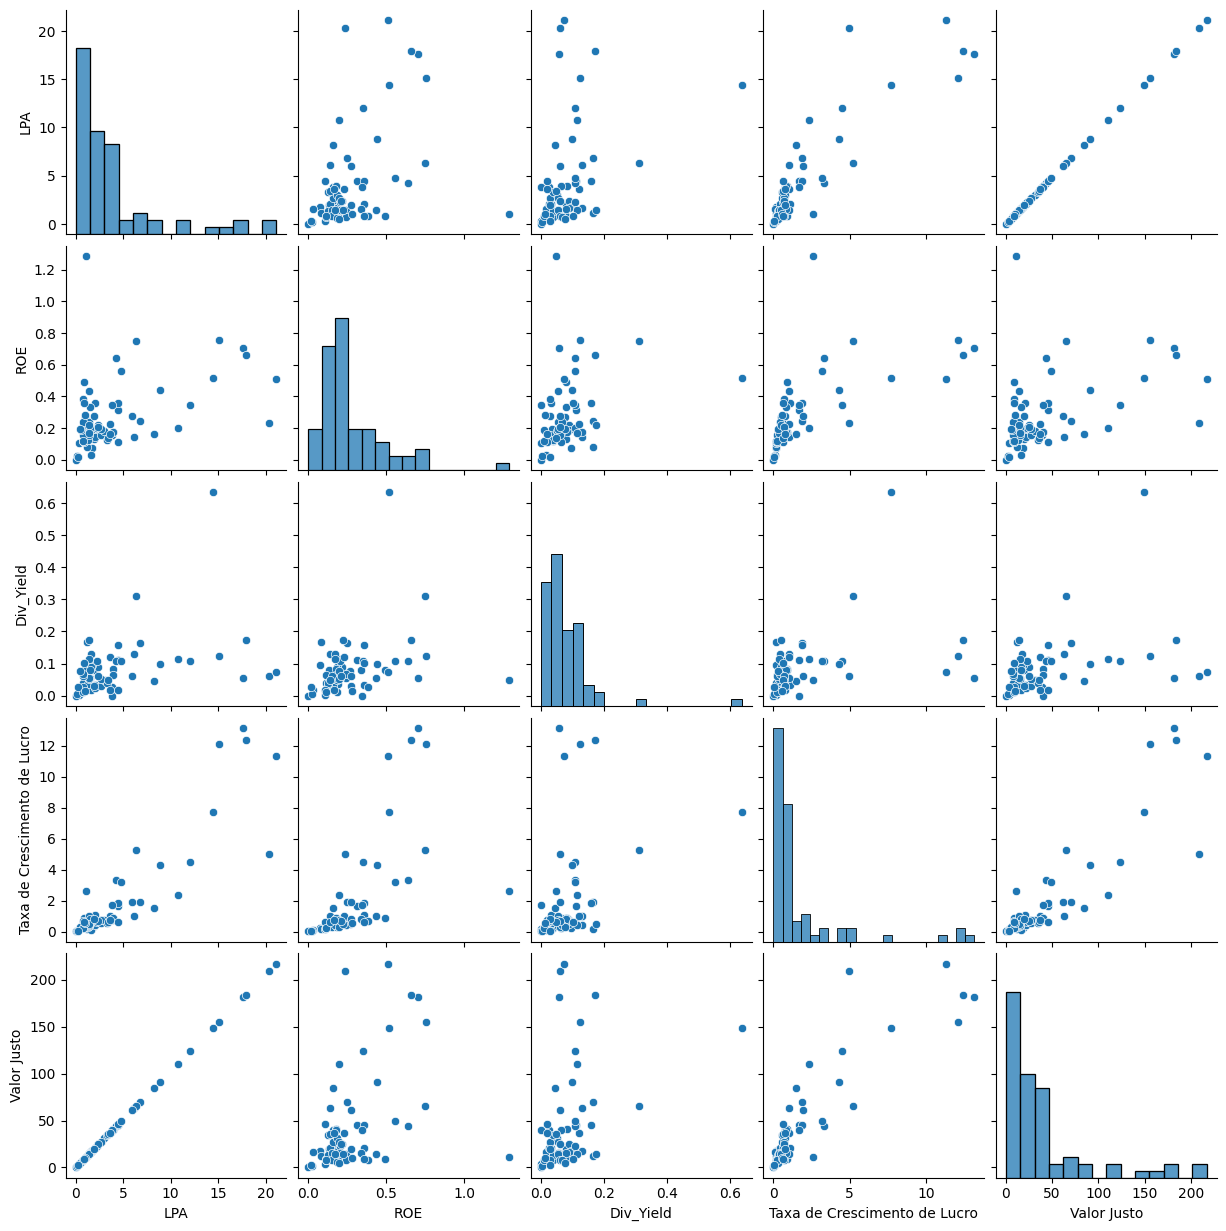

In [23]:
seaborn.pairplot(df)

Até a proxima, pessoal! 